# KTW_01: Citybike - 2018

Dane: https://otwartedane.medialabkatowice.eu/dataset/rower-miejski

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

#df_s18 = pd.read_csv('./data_01/stacje_2018.csv')
#df_s19 = pd.read_csv('./data_01/stacje_2019.csv')
#df_w18 = pd.read_csv('./data_01/wyp_2017.csv')
wyp = pd.read_csv('./data_01/wyp_2018.csv')

In [5]:
wyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193328 entries, 0 to 193327
Data columns (total 6 columns):
bike_num        193328 non-null int64
start_time      193328 non-null object
end_time        193328 non-null object
departure       193328 non-null object
return          193328 non-null object
duration_sec    193328 non-null int64
dtypes: int64(2), object(4)
memory usage: 8.8+ MB


In [6]:
wyp.sample(3)

,bike_num,start_time,end_time,departure,return,duration_sec
126862,58561,2018-08-08 19:54:08,2018-08-08 20:00:42,Osiedle Franciszkańskie,Kokociniec S.P nr 67,394
158250,58606,2018-09-09 17:19:28,2018-09-09 18:54:26,Katowice Rynek,Murapol Mariacka,5698
62444,58886,2018-06-06 07:14:08,2018-06-06 07:22:08,Katowice Rynek,Politechnika Śląska,480


In [7]:
wyp.describe()

,bike_num,duration_sec
count,193328.000000,193328.000000
mean,58652.008338,1822.247393
std,157.074455,3368.459259
min,58346.000000,0.000000
25%,58533.000000,385.000000
50%,58647.000000,704.000000
75%,58796.000000,2020.000000
max,58912.000000,251016.000000


## Średni czas wypożyczenia 

In [17]:
wyp.duration_sec.mean()

1822.2473930315318

## Liczba bezpłatnych wypożyczeń
Czas wypożyczenia < 15 min

In [8]:
wyp[wyp.duration_sec < 15*60 ].count()

bike_num        114372
start_time      114372
end_time        114372
departure       114372
return          114372
duration_sec    114372
dtype: int64

Poza zadaniem : sortowanie dataframe po wybranej kolumnie 

In [9]:
wyp.sort_values('bike_num')

,bike_num,start_time,end_time,departure,return,duration_sec
138692,58346,2018-08-18 22:37:46,2018-08-18 22:57:41,Katowice Rynek,Al. Bolesława Krzywoustego,1195
133710,58346,2018-08-14 19:21:24,2018-08-14 20:18:54,Osiedle Franciszkańskie,Katowice Rynek,3450
133755,58346,2018-08-14 20:33:13,2018-08-14 20:40:48,Katowice Rynek,KTBS – Krasińskiego 14,455
133815,58346,2018-08-14 21:19:15,2018-08-14 21:20:47,KTBS – Krasińskiego 14,KTBS – Krasińskiego 14,92
152119,58346,2018-09-01 18:18:26,2018-09-01 18:30:59,Silesia City Center,Katowice Rynek,753
...,...,...,...,...,...,...
192171,58910,2018-12-03 13:45:17,2018-12-03 15:15:57,COP24,COP24,5440
192269,58911,2018-12-04 12:29:32,2018-12-04 14:38:46,COP24,COP24,7754
192198,58911,2018-12-03 17:38:04,2018-12-03 17:41:02,COP24,COP24,178
193034,58911,2018-12-12 11:00:23,2018-12-12 11:09:14,COP24,Koszutka – Plac Gwarków,531


## Najpopularniejszy rower

In [28]:
wyp.groupby('bike_num')['bike_num'].count().sort_values(ascending=False).head(1)

bike_num
58463    822
Name: bike_num, dtype: int64

## Liczba wypożyczeń per stacja

In [31]:
wyp.groupby('departure')['duration_sec'].count().sort_values(ascending=False)

departure
Katowice Rynek                           31059
Silesia City Center                       9540
KTBS – Krasińskiego 14                    9247
Murapol Mariacka                          8998
Al. Bolesława Krzywoustego                7526
Al. Księcia Henryka Pobożnego             6843
Dolina 3-ch Stawów                        6739
COP24                                     6621
Ul. Powstańców - Biblioteka Śląska        6216
Plac Sejmu Śląskiego                      6069
Murapol Chorzowska                        5681
Plac Wolności                             5471
Załęże Skwer S. Barei                     5002
Ligota Medyków                            4788
Galeria 3 Stawy                           4409
Al. Księżnej Jadwigi Śląskiej             4166
Politechnika Śląska                       4131
Park Kościuszki                           3914
Koszutka – Plac Gwarków                   3833
Ligota Dworzec PKP                        3690
Green Park                                3599
KTB

## Liczba zwrotów per stacja

In [34]:
wyp.groupby('return')['duration_sec'].count().sort_values(ascending=False)

return
Katowice Rynek                           32656
Murapol Mariacka                          9286
KTBS – Krasińskiego 14                    9104
Silesia City Center                       8886
Al. Bolesława Krzywoustego                8233
Al. Księcia Henryka Pobożnego             7118
Dolina 3-ch Stawów                        7018
COP24                                     6339
Ul. Powstańców - Biblioteka Śląska        6088
Plac Sejmu Śląskiego                      5813
Plac Wolności                             5632
Murapol Chorzowska                        5288
Załęże Skwer S. Barei                     4996
Ligota Medyków                            4826
Galeria 3 Stawy                           4574
Al. Księżnej Jadwigi Śląskiej             4240
Park Kościuszki                           3790
Politechnika Śląska                       3768
Ligota Dworzec PKP                        3672
KTBS – Saint Etienne 1                    3608
Green Park                                3531
Koszut

## Najpopularniejsza trasa

In [35]:
wyp.groupby(['departure', 'return'])['duration_sec'].count().sort_values(ascending=False)

departure                       return                           
Katowice Rynek                  Katowice Rynek                       7273
Dolina 3-ch Stawów              Dolina 3-ch Stawów                   3960
Al. Księcia Henryka Pobożnego   Al. Księcia Henryka Pobożnego        3512
KTBS – Krasińskiego 14          Katowice Rynek                       3422
Al. Bolesława Krzywoustego      Al. Bolesława Krzywoustego           3284
                                                                     ... 
ING Roździeńska                 Załęże Skwer S. Barei                   1
PKN Orlen - Al. Roździeńskiego  Plac Wolności                           1
                                Os. Kukuczki – Skwer Koszycki           1
                                Koszutka – Plac Gwarków                 1
Murapol Chorzowska              Kostuchna – Rondo Rostworowskiego       1
Name: duration_sec, Length: 2141, dtype: int64

## Najpopularniejszy miesiąc

Zmiana formatu kolumn start `time` i `endtime` z object na datetime64

In [11]:
wyp['start_time'] = pd.to_datetime(wyp['start_time'], format='%Y-%m-%d %H:%M:%S')
wyp['end_time'] = pd.to_datetime(wyp['end_time'], format='%Y-%m-%d %H:%M:%S')
wyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193328 entries, 0 to 193327
Data columns (total 6 columns):
bike_num        193328 non-null int64
start_time      193328 non-null datetime64[ns]
end_time        193328 non-null datetime64[ns]
departure       193328 non-null object
return          193328 non-null object
duration_sec    193328 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 8.8+ MB


Dodanie kolumn `day` i `month`

In [17]:
print(wyp['start_time'][1])

2018-04-01 00:10:28


In [26]:
print(wyp['start_time'][1].day)
print(wyp['start_time'][1].month)
print(wyp['start_time'][1].year)

1
4
2018


In [39]:
wyp['day'] = wyp['start_time'].apply(lambda x: x.day)
wyp['month'] = wyp['start_time'].apply(lambda x: x.month)

Dzień z największą liczbą wypożyczeń

In [40]:
wyp.groupby(['day', 'month'])['duration_sec'].count().sort_values(ascending=False)

day  month
15   8        1525
20   6        1478
14   4        1459
6    6        1440
31   5        1440
              ... 
1    4          47
2    12         45
11   12         44
9    12         41
16   12         30
Name: duration_sec, Length: 260, dtype: int64

Miesiąc z najwyższą liczbą wypożyczeń

In [41]:
wyp.groupby('month')['bike_num'].count().sort_values(ascending=False).head(1)

month
8    33383
Name: bike_num, dtype: int64

Poza zadaniem: Liczba unikalnych rowerów miejskich

In [43]:
wyp.bike_num.nunique()

422

### Dni tygodnia

In [33]:
wyp['day_of_week'] = pd.to_datetime(wyp['start_time']).dt.day_name()

In [34]:
wyp['day_of_week_n'] = wyp['day_of_week'].apply(lambda x: 'weekend' if x in ['Sunday', 'Saturday'] else 'week')

In [46]:
wyp.sample(10)

,bike_num,start_time,end_time,departure,return,duration_sec,day,month,day_of_week,day_of_week_n
124645,58572,2018-08-06 20:20:49,2018-08-06 20:28:39,Koszutka – Plac Gwarków,Katowice Rynek,470,6,8,Monday,week
136181,58532,2018-08-16 18:03:57,2018-08-16 18:08:33,Murapol Mariacka,Ul. Powstańców - Biblioteka Śląska,276,16,8,Thursday,week
45312,58402,2018-05-20 15:29:38,2018-05-20 16:10:15,Katowice Rynek,Al. Księcia Henryka Pobożnego,2437,20,5,Sunday,weekend
26149,58459,2018-04-28 20:22:35,2018-04-28 21:31:18,Al. Księcia Henryka Pobożnego,Al. Księcia Henryka Pobożnego,4123,28,4,Saturday,weekend
177925,58786,2018-10-13 13:45:08,2018-10-13 13:54:07,ING Sokolska,Silesia City Center,539,13,10,Saturday,weekend
59722,58654,2018-06-03 20:22:44,2018-06-03 20:49:30,Plac Wolności,Plac Sejmu Śląskiego,1606,3,6,Sunday,weekend
167948,58832,2018-09-22 19:45:27,2018-09-22 20:09:08,Galeria 3 Stawy,Katowice Rynek,1421,22,9,Saturday,weekend
156646,58871,2018-09-07 20:00:26,2018-09-07 20:01:49,Murapol Mariacka,Murapol Mariacka,83,7,9,Friday,week
90160,58742,2018-07-02 21:35:00,2018-07-02 21:49:17,Piotrowice V L.O.,Ligota Wczasowa,857,2,7,Monday,week
183825,58385,2018-10-29 11:16:57,2018-10-29 11:39:50,Ligota Wczasowa,Kostuchna – Bażantów,1373,29,10,Monday,week


In [36]:
wyp.groupby('day_of_week')['bike_num'].count().sort_values(ascending=False)

day_of_week
Sunday       28947
Wednesday    28485
Monday       27830
Thursday     27525
Tuesday      27139
Friday       26707
Saturday     26695
Name: bike_num, dtype: int64

# CityBike 2017

In [3]:
import pandas as pd
df = pd.read_csv('./data_01/wyp_2017.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102256 entries, 0 to 102255
Data columns (total 6 columns):
bike_num        102256 non-null int64
start_time      102256 non-null object
end_time        102256 non-null object
departure       102256 non-null object
return          102256 non-null object
duration_sec    102256 non-null int64
dtypes: int64(2), object(4)
memory usage: 4.7+ MB


## Średni czas wypożyczenia 

In [4]:
df.duration_sec.mean()

2021.376134407761

## Liczba bezpłatnych wypożyczeń
Czas wypożyczenia < 15 min

In [5]:
df[df.duration_sec < 15*60 ].count()

bike_num        57998
start_time      57998
end_time        57998
departure       57998
return          57998
duration_sec    57998
dtype: int64

## Najpopularniejszy rower

In [8]:
df.groupby('bike_num')['bike_num'].count().sort_values(ascending=False).head(1)

bike_num
58521    627
Name: bike_num, dtype: int64

## Liczba wypożyczeń per stacja

In [9]:
df.groupby('bike_num')['bike_num'].count().sort_values(ascending=False).head(1)

bike_num
58521    627
Name: bike_num, dtype: int64

## Liczba zwrotów per stacja

In [11]:
df.groupby('return')['duration_sec'].count().sort_values(ascending=False)

return
Katowice Rynek                           19062
Al. Księcia Henryka Pobożnego             5214
Al. Bolesława Krzywoustego                5204
Silesia City Center                       5193
KTBS – Krasińskiego 14                    5161
Murapol Mariacka                          5121
Dolina 3-ch Stawów                        4633
NOSPR Katowice                            4056
Ul. Powstańców - Biblioteka Śląska        3469
Murapol Chorzowska                        3452
Ligota Medyków                            3404
Plac Sejmu Śląskiego                      3037
Park Kościuszki                           3009
Al. Księżnej Jadwigi Śląskiej             2791
Ligota Wczasowa                           2696
Ligota Dworzec PKP                        2679
KTBS – Saint Etienne 1                    2617
Galeria 3 Stawy                           2516
Bogucice Szpital                          2090
Załęże Skwer S. Barei                     1997
Politechnika Śląska                       1860
Skwer 

## Najpopularniejsza trasa

In [12]:
df.groupby(['departure', 'return'])['duration_sec'].count().sort_values(ascending=False)

departure                       return                               
Katowice Rynek                  Katowice Rynek                           5954
Dolina 3-ch Stawów              Dolina 3-ch Stawów                       3003
Al. Księcia Henryka Pobożnego   Al. Księcia Henryka Pobożnego            2980
Al. Bolesława Krzywoustego      Al. Bolesława Krzywoustego               2215
KTBS – Krasińskiego 14          Katowice Rynek                           2044
                                                                         ... 
Politechnika Śląska             Giszowiec - Plac Pod Lipami                 1
Osiedle Witosa - Plac Herberta  Galeria 3 Stawy                             1
Politechnika Śląska             Kokociniec S.P nr 67                        1
KTBS – Krasińskiego 14          Szopienice - Plac Powstańców Śląskich       1
Kokociniec S.P nr 67            Galeria 3 Stawy                             1
Name: duration_sec, Length: 940, dtype: int64

## Najpopularniejszy miesiąc

In [13]:
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102256 entries, 0 to 102255
Data columns (total 6 columns):
bike_num        102256 non-null int64
start_time      102256 non-null datetime64[ns]
end_time        102256 non-null datetime64[ns]
departure       102256 non-null object
return          102256 non-null object
duration_sec    102256 non-null int64
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 4.7+ MB


In [14]:
df['day'] = df['start_time'].apply(lambda x: x.day)
df['month'] = df['start_time'].apply(lambda x: x.month)

In [15]:
df.groupby(['day', 'month'])['duration_sec'].count().sort_values(ascending=False)

day  month
18   5        1328
28   5        1275
17   5        1260
19   5        1179
14   5        1163
              ... 
8    10         45
28   4          45
23   9          32
29   10         17
17   9          16
Name: duration_sec, Length: 202, dtype: int64

In [16]:
df.groupby('month')['bike_num'].count().sort_values(ascending=False).head(1)

month
5    24392
Name: bike_num, dtype: int64

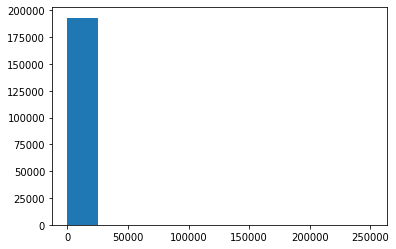

In [37]:
plt.hist(wyp.duration_sec, bins=10);